In [10]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
p_to_tables = Path("../../results/simulations/model_validation/66a4812a698999d109af3766a9d7b6236a0f956fe7a132cc93a9fb192a2e2384-2400")
proposals_df = pd.read_csv(p_to_tables.joinpath("proposals.csv"))
start_data_df = pd.read_csv(p_to_tables.joinpath("start_data.csv"))
timestep_data_df = pd.read_csv(p_to_tables.joinpath("timestep_data.csv"))

In [17]:
proposals_df

,proposal_id,proposal_status,submittedAt,scheduledAt,executedAt,cancelledAt,unique_run_key
0,1,ProposalStatus.Executed,175,199,215,NaN,0
1,2,ProposalStatus.Executed,703,727,743,NaN,0
2,3,ProposalStatus.Executed,746,770,786,NaN,0
3,4,ProposalStatus.Executed,825,849,865,NaN,0
4,5,ProposalStatus.Executed,920,944,960,NaN,0
5,6,ProposalStatus.Executed,1129,1153,1169,NaN,0
6,7,ProposalStatus.Executed,1222,1246,1262,NaN,0
7,8,ProposalStatus.Executed,1424,1448,1464,NaN,0
8,9,ProposalStatus.Executed,1436,1460,1476,NaN,0
9,10,ProposalStatus.Executed,1556,1662,1770,NaN,0


In [18]:
start_data_df

,seed,first_seal_rage_quit_support,second_seal_rage_quit_support,n_actors,Normal,Quick,Slow,NoReaction,BaseActor,HonestActor,SingleAttacker,CoordinatedAttacker,Hacker,SingleDefender,CoordinatedDefender,unique_run_key
0,2010,30000000000000000,150000000000000000,1207,145,24,868,170,0,1207,0,0,0,0,0,0


In [19]:
timestep_data_df.head()

,unique_run_key,timestep,dg_state_value,dg_state_name,dg_dynamic_timelock_seconds,total_balance,total_locked,total_health,total_actors,balance_Normal,...,health_Quick,health_Slow,health_NoReaction,health_BaseActor,health_HonestActor,health_SingleAttacker,health_CoordinatedAttacker,health_Hacker,health_SingleDefender,health_CoordinatedDefender
0,0,1,1,Normal,0,6.971984e+06,0.0,59165.0,NaN,360532.705968,...,1192.0,42612.0,8575.0,0,59165.0,0,0,0,0,0
1,0,2,1,Normal,0,6.971984e+06,0.0,59165.0,NaN,360532.705968,...,1192.0,42612.0,8575.0,0,59165.0,0,0,0,0,0
2,0,3,1,Normal,0,6.971984e+06,0.0,59165.0,NaN,360532.705968,...,1192.0,42612.0,8575.0,0,59165.0,0,0,0,0,0
3,0,4,1,Normal,0,6.971984e+06,0.0,59165.0,NaN,360532.705968,...,1192.0,42612.0,8575.0,0,59165.0,0,0,0,0,0
4,0,5,1,Normal,0,6.971984e+06,0.0,59165.0,NaN,360532.705968,...,1192.0,42612.0,8575.0,0,59165.0,0,0,0,0,0


<Axes: xlabel='timestep', ylabel='total_locked'>

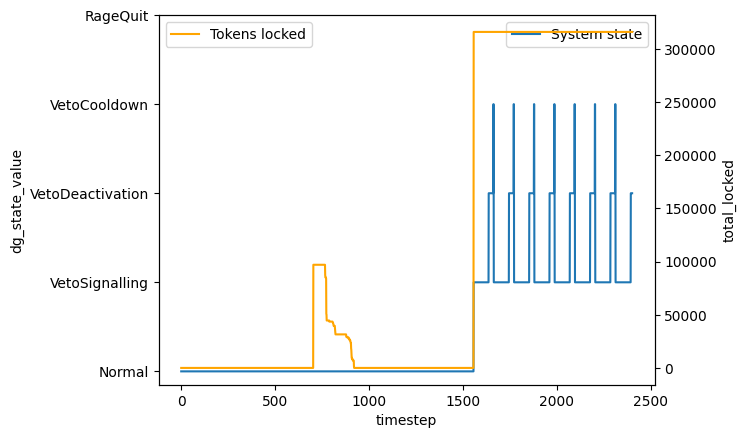

In [30]:
fig, ax = plt.subplots()
sns.lineplot(data=timestep_data_df, x="timestep", y="dg_state_value", ax=ax, label="System state")
ax.set_yticks([1,2,3,4,5], ["Normal", "VetoSignalling", "VetoDeactivation", "VetoCooldown", "RageQuit"])

ax2 = ax.twinx()
sns.lineplot(data=timestep_data_df, x="timestep", y="total_locked", ax=ax2, color='orange', label="Tokens locked")